# Contoh 2 Classification

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
df = pd.read_excel('book2.xlsx')

In [3]:
df.describe()

,UHH,Pengeluaran,HLS,RLS,IPM
count,514.000000,514.000000,514.000000,514.000000,514.000000
mean,69.397160,10443.103113,12.888969,8.216167,69.524163
std,3.486261,2712.097164,1.341675,1.649844,6.548357
min,55.120000,4181.000000,3.290000,0.970000,30.750000
25%,67.087500,8652.500000,12.290000,7.272500,66.330000
50%,69.780000,10293.500000,12.815000,8.110000,69.170000
75%,71.747500,11812.000000,13.510000,9.110000,72.765000
max,77.550000,23851.000000,17.390000,12.640000,86.650000


NB: Sebenarnya membuat klasifikasi dari data IPM dari variabel pembangunnya (UHH, Pengeluaran, dll) ini tidak boleh, karena ga guna buat apa capek2 bikin model, padahal bisa disortir pake excel. Tapi gapapalah buat contoh ae

<60 rendah

60<= x <70 sedang

70<= x <80 tinggi

=>80 sangat tinggi

In [4]:
df.head()

,Prov_Kab_Kota,UHH,Pengeluaran,HLS,RLS,IPM
0,Simeulue,65.22,7210,13.51,9.08,65.70
1,Aceh Singkil,67.36,8715,14.30,8.52,68.91
2,Aceh Selatan,64.27,8187,14.41,8.59,66.90
3,Aceh Tenggara,68.04,8067,13.99,9.65,69.36
4,Aceh Timur,68.67,8600,13.02,7.86,67.39


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='IPM', ylabel='Density'>

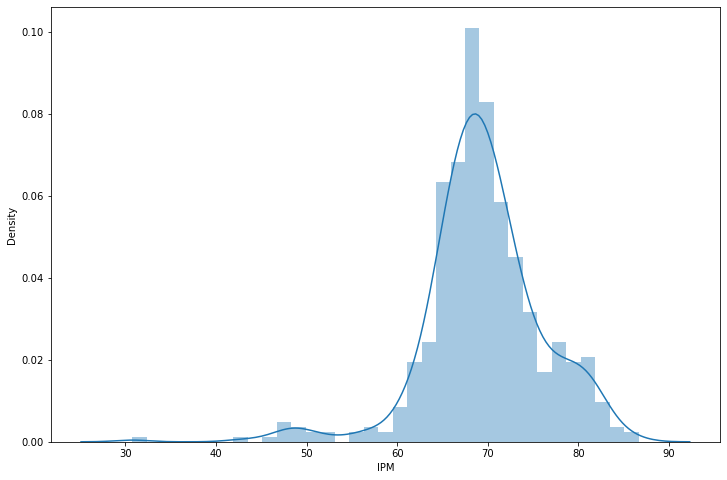

In [5]:
plt.figure(figsize=(12,8))
sns.distplot(df['IPM'])

In [6]:
#membuat klasifikasi
bins = [0,60,70,80,100]

In [7]:
data = df.copy() #df.copy agar data di df tidak berubah

In [8]:
name = ['Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi']

In [9]:
df['IPM'] = pd.cut(df.IPM, bins, labels=name)

In [10]:
df.head()

,Prov_Kab_Kota,UHH,Pengeluaran,HLS,RLS,IPM
0,Simeulue,65.22,7210,13.51,9.08,Sedang
1,Aceh Singkil,67.36,8715,14.30,8.52,Sedang
2,Aceh Selatan,64.27,8187,14.41,8.59,Sedang
3,Aceh Tenggara,68.04,8067,13.99,9.65,Sedang
4,Aceh Timur,68.67,8600,13.02,7.86,Sedang


<AxesSubplot:xlabel='IPM', ylabel='count'>

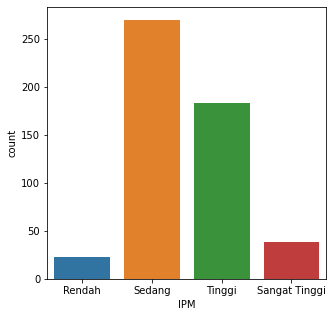

In [11]:
plt.figure(figsize=(5,5))
sns.countplot(x='IPM', data=df)

eh ini gw gatau kenapa gabisa klasifikasi pake label nama wkwkwk, jadinya ditransform ke angka

In [12]:
names = [0,1,2,3]

In [13]:
data['IPM'] = pd.cut(data.IPM, bins, labels=names)

In [14]:
data = data.drop('Prov_Kab_Kota', axis=1)

In [15]:
data

,UHH,Pengeluaran,HLS,RLS,IPM
0,65.22,7210,13.51,9.08,1
1,67.36,8715,14.30,8.52,1
2,64.27,8187,14.41,8.59,1
3,68.04,8067,13.99,9.65,1
4,68.67,8600,13.02,7.86,1
...,...,...,...,...,...
509,65.61,5702,5.19,1.96,0
510,65.60,5709,10.57,4.92,0
511,65.51,5593,7.36,2.64,0
512,65.11,4958,9.80,3.00,0


In [16]:
X = data.drop('IPM', axis=1).values
y = data['IPM'].values

In [17]:
y

[1, 1, 1, 1, 1, ..., 0, 0, 0, 0, 3]
Length: 514
Categories (4, int64): [0 < 1 < 2 < 3]

<AxesSubplot:xlabel='IPM', ylabel='count'>

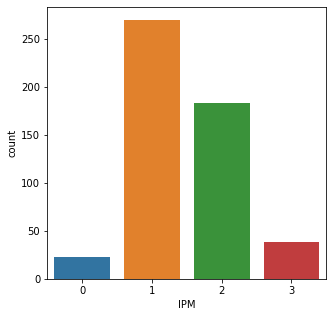

In [18]:
plt.figure(figsize=(5,5))
sns.countplot(x='IPM', data=data)

0 = rendah
1 = sedang
2 = tinggi
3 = sangat tinggi

One Hot Encoding

ngubah nilai klasifikasi tadi jadi bentuk array

rendah = 0 = [1. 0. 0. 0]

sedang = 1 = [0. 1. 0. 0]

dst

gw gatau alasan pake ini apa, pake ae
soale klo gapake gabisa awokawok

In [19]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
ohe = OneHotEncoder(sparse=False)
y = le.fit_transform(y)
y = ohe.fit_transform(y.reshape(-1,1))
print(y)

[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=221810445)

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [23]:
X_train.shape

(359, 4)

In [24]:
model = Sequential()

model.add(Dense(units=4,activation='relu'))
model.add(Dense(units=6,activation='relu'))
model.add(Dense(units=6,activation='relu'))
model.add(Dense(units=6,activation='relu'))
model.add(Dense(units=4,activation='softmax')) #klo binary classification diganti jadi sigmoid

# For a categorical classification problem
model.compile(loss='categorical_crossentropy', optimizer='adam')
# klo binary  classification diganti jadi binary_crossentropy

In [25]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=500,
          verbose=1, 
          validation_data=(X_test, y_test))

Epoch 1/500
12/12 [==============================] - 0s 15ms/step - loss: 1.3826 - val_loss: 1.3777
Epoch 2/500
12/12 [==============================] - 0s 3ms/step - loss: 1.3726 - val_loss: 1.3691
Epoch 3/500
12/12 [==============================] - 0s 3ms/step - loss: 1.3633 - val_loss: 1.3607
Epoch 4/500
12/12 [==============================] - 0s 2ms/step - loss: 1.3537 - val_loss: 1.3522
Epoch 5/500
12/12 [==============================] - 0s 3ms/step - loss: 1.3437 - val_loss: 1.3432
Epoch 6/500
12/12 [==============================] - 0s 2ms/step - loss: 1.3331 - val_loss: 1.3341
Epoch 7/500
12/12 [==============================] - 0s 2ms/step - loss: 1.3219 - val_loss: 1.3243
Epoch 8/500
12/12 [==============================] - 0s 3ms/step - loss: 1.3105 - val_loss: 1.3136
Epoch 9/500
12/12 [==============================] - 0s 3ms/step - loss: 1.2959 - val_loss: 1.3024
Epoch 10/500
12/12 [==============================] - 0s 2ms/step - loss: 1.2809 - val_loss: 1.2893
Epoch 11

12/12 [==============================] - 0s 3ms/step - loss: 0.8975 - val_loss: 0.9706
Epoch 84/500
12/12 [==============================] - 0s 3ms/step - loss: 0.8852 - val_loss: 0.9599
Epoch 85/500
12/12 [==============================] - 0s 2ms/step - loss: 0.8740 - val_loss: 0.9486
Epoch 86/500
12/12 [==============================] - 0s 3ms/step - loss: 0.8597 - val_loss: 0.9377
Epoch 87/500
12/12 [==============================] - 0s 3ms/step - loss: 0.8486 - val_loss: 0.9272
Epoch 88/500
12/12 [==============================] - 0s 2ms/step - loss: 0.8347 - val_loss: 0.9139
Epoch 89/500
12/12 [==============================] - 0s 3ms/step - loss: 0.8220 - val_loss: 0.9018
Epoch 90/500
12/12 [==============================] - 0s 3ms/step - loss: 0.8142 - val_loss: 0.8924
Epoch 91/500
12/12 [==============================] - 0s 3ms/step - loss: 0.8018 - val_loss: 0.8822
Epoch 92/500
12/12 [==============================] - 0s 3ms/step - loss: 0.7934 - val_loss: 0.8749
Epoch 93/500


12/12 [==============================] - 0s 3ms/step - loss: 0.4113 - val_loss: 0.4690
Epoch 165/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4097 - val_loss: 0.4657
Epoch 166/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4091 - val_loss: 0.4635
Epoch 167/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4046 - val_loss: 0.4626
Epoch 168/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4015 - val_loss: 0.4579
Epoch 169/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4008 - val_loss: 0.4551
Epoch 170/500
12/12 [==============================] - 0s 3ms/step - loss: 0.3967 - val_loss: 0.4536
Epoch 171/500
12/12 [==============================] - 0s 3ms/step - loss: 0.3945 - val_loss: 0.4533
Epoch 172/500
12/12 [==============================] - 0s 3ms/step - loss: 0.3937 - val_loss: 0.4511
Epoch 173/500
12/12 [==============================] - 0s 3ms/step - loss: 0.3938 - val_loss: 0.4396
Epoc

12/12 [==============================] - 0s 2ms/step - loss: 0.2739 - val_loss: 0.3126
Epoch 246/500
12/12 [==============================] - 0s 2ms/step - loss: 0.2726 - val_loss: 0.3090
Epoch 247/500
12/12 [==============================] - 0s 2ms/step - loss: 0.2760 - val_loss: 0.2998
Epoch 248/500
12/12 [==============================] - 0s 2ms/step - loss: 0.2730 - val_loss: 0.3172
Epoch 249/500
12/12 [==============================] - 0s 2ms/step - loss: 0.2654 - val_loss: 0.2973
Epoch 250/500
12/12 [==============================] - 0s 2ms/step - loss: 0.2666 - val_loss: 0.3066
Epoch 251/500
12/12 [==============================] - 0s 2ms/step - loss: 0.2655 - val_loss: 0.3030
Epoch 252/500
12/12 [==============================] - 0s 2ms/step - loss: 0.2659 - val_loss: 0.2929
Epoch 253/500
12/12 [==============================] - 0s 2ms/step - loss: 0.2624 - val_loss: 0.3030
Epoch 254/500
12/12 [==============================] - 0s 2ms/step - loss: 0.2610 - val_loss: 0.2938
Epoc

12/12 [==============================] - 0s 3ms/step - loss: 0.1950 - val_loss: 0.2196
Epoch 327/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1919 - val_loss: 0.2183
Epoch 328/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1918 - val_loss: 0.2093
Epoch 329/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1918 - val_loss: 0.2149
Epoch 330/500
12/12 [==============================] - 0s 3ms/step - loss: 0.1904 - val_loss: 0.2133
Epoch 331/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1886 - val_loss: 0.2184
Epoch 332/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1893 - val_loss: 0.2126
Epoch 333/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1894 - val_loss: 0.2103
Epoch 334/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1955 - val_loss: 0.2068
Epoch 335/500
12/12 [==============================] - 0s 2ms/step - loss: 0.2011 - val_loss: 0.2320
Epoc

12/12 [==============================] - 0s 3ms/step - loss: 0.1425 - val_loss: 0.1708
Epoch 408/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1440 - val_loss: 0.1586
Epoch 409/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1506 - val_loss: 0.1582
Epoch 410/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1479 - val_loss: 0.1656
Epoch 411/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1440 - val_loss: 0.1546
Epoch 412/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1428 - val_loss: 0.1649
Epoch 413/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1407 - val_loss: 0.1531
Epoch 414/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1411 - val_loss: 0.1540
Epoch 415/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1401 - val_loss: 0.1575
Epoch 416/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1396 - val_loss: 0.1575
Epoc

12/12 [==============================] - 0s 2ms/step - loss: 0.1124 - val_loss: 0.1371
Epoch 489/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1148 - val_loss: 0.1286
Epoch 490/500
12/12 [==============================] - 0s 4ms/step - loss: 0.1131 - val_loss: 0.1237
Epoch 491/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1111 - val_loss: 0.1253
Epoch 492/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1185 - val_loss: 0.1306
Epoch 493/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1171 - val_loss: 0.1178
Epoch 494/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1114 - val_loss: 0.1274
Epoch 495/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1110 - val_loss: 0.1209
Epoch 496/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1137 - val_loss: 0.1241
Epoch 497/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1116 - val_loss: 0.1165
Epoc

In [26]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

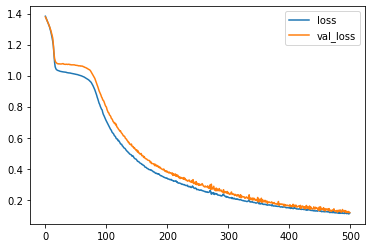

In [27]:
losses.plot()

In [28]:
X_test

array([[ 0.73898858,  0.59490717,  0.76095947,  0.91883768],
       [ 0.49755302,  0.36375895,  0.59801489,  0.58316633],
       [ 0.81674823,  0.63655222,  0.63771712,  0.87875752],
       [ 0.63023382,  0.15377036,  0.62531017,  0.68036072],
       [ 0.38607939,  0.11881548,  0.54755997,  0.65831663],
       [ 0.52202284,  0.288663  ,  0.54177006,  0.5240481 ],
       [ 0.72756933,  0.34109532,  0.63606286,  0.60621242],
       [ 0.80097879,  0.40861944,  0.71133168,  0.9008016 ],
       [ 0.30723219,  0.26060575,  0.56741108,  0.54408818],
       [ 0.20989668,  0.35338658,  0.6038048 ,  0.73146293],
       [ 0.58781947,  0.27243025,  0.58064516,  0.51402806],
       [ 0.28983143,  0.21522664,  0.68403639,  0.501002  ],
       [ 0.65579119,  0.36723369,  0.65756824,  0.58517034],
       [ 0.48287113,  0.18540608,  0.5318445 ,  0.46593186],
       [ 0.38662316,  0.11399232,  0.4375517 ,  0.24248497],
       [ 0.50570962,  0.33668707,  0.6120761 ,  0.65831663],
       [ 0.6639478 ,  0.

In [29]:
predictions = model.predict_classes(X_test) #klo ada warning biarin ae

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [30]:
predictions

array([3, 1, 3, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 1, 1,
       0, 2, 3, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 3,
       2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1,
       1, 1, 2, 2, 2, 3, 2, 3, 3, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 2,
       0, 1, 1, 2, 1, 3, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2,
       3, 2, 0, 2, 2, 3, 2, 1, 0, 2, 1, 1, 3, 1, 1, 1, 1, 2, 1, 2, 1, 2,
       1, 1, 1, 2, 1, 2, 2, 1, 0, 1, 2, 3, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1], dtype=int64)

In [31]:
from sklearn.metrics import classification_report,confusion_matrix

ini nge-invers one hot encoding tadi biar balik ke awal (0,1,2,3)

In [32]:
inv_y = ohe.inverse_transform(y_test)
inv_y = le.inverse_transform(inv_y.astype(int).ravel())
inv_y

array([3, 1, 3, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 1, 1,
       0, 2, 3, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1,
       1, 1, 2, 2, 2, 3, 2, 3, 3, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 2,
       0, 1, 1, 2, 1, 3, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 2, 1, 1, 2,
       2, 2, 0, 1, 2, 3, 2, 1, 0, 2, 1, 1, 3, 1, 1, 1, 1, 2, 1, 2, 1, 2,
       1, 1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 3, 1, 2, 3, 2, 2, 2, 2, 1, 1, 1,
       1], dtype=int64)

In [33]:
print(classification_report(inv_y,predictions))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.95      0.97      0.96        75
           2       0.95      0.92      0.93        60
           3       0.83      0.91      0.87        11

    accuracy                           0.94       155
   macro avg       0.93      0.92      0.93       155
weighted avg       0.94      0.94      0.94       155



akurasi 97% cuy
yaiyalah orang yg jadi variabelnya, variabel pembangun IPM

# Nyoba

In [34]:
simeulue = data.drop('IPM', axis=1).iloc[0]
#iloc[0] untuk mengambil data pada baris pertama

In [35]:
simeulue

UHH              65.22
Pengeluaran    7210.00
HLS              13.51
RLS               9.08
Name: 0, dtype: float64

In [36]:
simeulue = simeulue.values.reshape(-1, 4) 

In [37]:
simeulue

array([[  65.22, 7210.  ,   13.51,    9.08]])

In [38]:
simeulue = scaler.transform(simeulue) #minmaxscaler

In [39]:
model.predict_classes(simeulue)

array([1], dtype=int64)

In [40]:
df.head(1)

,Prov_Kab_Kota,UHH,Pengeluaran,HLS,RLS,IPM
0,Simeulue,65.22,7210,13.51,9.08,Sedang


1 = sedang, bener lah ya